In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad


In [2]:
from xenu import load_solars

neutrinos = load_solars()

In [3]:
Ers = np.logspace(-1, 5, 100) # keV

## Standard Model

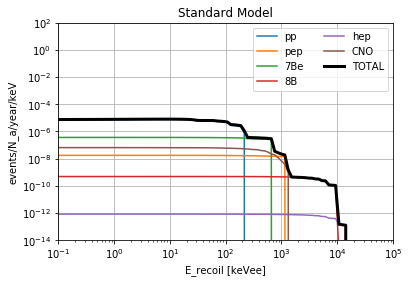

In [4]:
SM_sum = None
for nu in neutrinos:
    dRdE = nu.dRdE_SM(Ers)
    if SM_sum is None:
        SM_sum = dRdE
    else:
        SM_sum += dRdE
    plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, SM_sum, color='k', linewidth=3, label='TOTAL')
plt.yscale('log')
plt.xlim(1e-1, 1e5)
plt.xscale('log')
plt.ylim(1e-14, 1e2)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend(ncol=2)
plt.title("Standard Model")
plt.grid()
plt.show()

In [5]:
scaler = 54 * 1e6/131.3

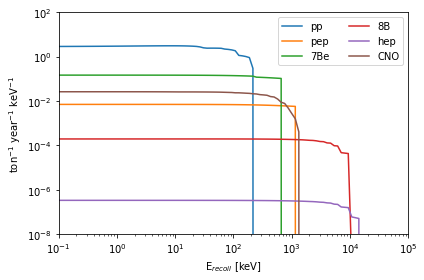

In [6]:
SM_sum = None
for nu in neutrinos:
    dRdE = nu.dRdE_SM(Ers) * scaler
    if SM_sum is None:
        SM_sum = dRdE
    else:
        SM_sum += dRdE
    plt.plot(Ers, dRdE, label=nu.label)
    
#plt.plot(Ers, SM_sum, color='k', linewidth=3, label='TOTAL')
plt.yscale('log')
plt.xlim(1e-1, 1e5)
plt.xscale('log')
plt.ylim(1e-8, 1e2)
plt.ylabel('ton$^{-1}$ year$^{-1}$ keV$^{-1}$')
plt.xlabel("E$_{recoil}$ [keV]")
plt.legend(ncol=2)
#plt.title("SM + SSM")
plt.tight_layout()
plt.savefig('solarnu_rates.pdf')
plt.show()

## Neutrino Magnetic Moment

See Kopp et. al. _Exploring neutrino signals in dark matter detectors_

In [7]:
xe1t_background = 70 # events/ton/year/keV
# convert to to events/mol_electrons/year/keV
xe1t_background = xe1t_background * (1e-6) * 131.3 / 54

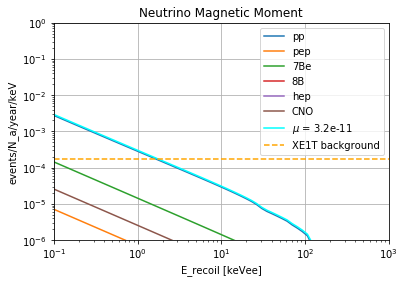

In [8]:
Ers = np.logspace(-1, 5, 100) # keV

mu = 0.32e-10
#mu = 0.5e-10
# add onto the SM "Background"
numu_sum = None #SM_sum.copy()
for nu in neutrinos:
    dRdE = nu.dRdE_numu(Ers, mu)
    if numu_sum is None:
        numu_sum = dRdE
    else:
        numu_sum += dRdE
    plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, numu_sum, color='cyan', label='$\mu$ = %0.1e' % mu)
#plt.plot(Ers, SM_sum, color='black', alpha=0.8, label='SM')
plt.axhline(xe1t_background, color='orange', linestyle='dashed', label='XE1T background')
plt.yscale('log')
plt.xlim(1e-1, 1e3)
plt.xscale('log')
plt.ylim(1e-6, 1e0)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend()
plt.title("Neutrino Magnetic Moment")
plt.grid()
plt.show()

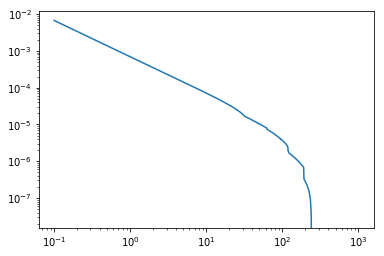

In [9]:
# get nu magnetic moment for pp neutrino only
# for LowER signal model
Ers = np.logspace(-1, 3, 1000) # keV
mu_base = 5e-11
nu = neutrinos[0]

# in events/mol_e/year/keV
dRdE = nu.dRdE_numu(Ers, mu_base)
# convert to events/tonne/year/keV


plt.plot(Ers, dRdE)
plt.yscale('log')
plt.xscale('log')
plt.show()

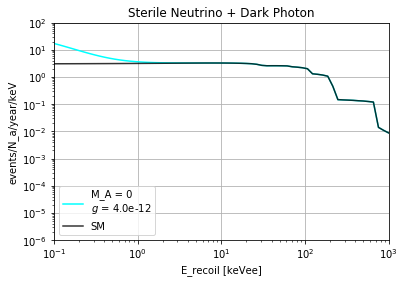

In [10]:
Ers = np.logspace(-1, 5, 100) # keV

M_A = 10e-3 # keV
gg = 4e-12

#mu = 0.5e-10
# add onto the SM "Background"
BminusL_sum = SM_sum.copy()
for nu in neutrinos:
    dRdE = nu.dRdE_BminusL(Ers, np.sqrt(gg), M_A)
    if BminusL_sum is None:
        BminusL_sum = dRdE
    else:
        BminusL_sum += dRdE
    #plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, BminusL_sum, color='cyan', label='M_A = %d\n$g$ = %0.1e' % (M_A, gg))
plt.plot(Ers, SM_sum, color='black', alpha=0.8, label='SM')
#plt.axhline(xe1t_background, color='orange', linestyle='dashed', label='XE1T background')
plt.yscale('log')
plt.xlim(1e-1, 1e3)
plt.xscale('log')
plt.ylim(1e-6, 1e2)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend()
plt.title("Sterile Neutrino + Dark Photon")
plt.grid()
plt.show()